In [1]:
from herbie import Herbie

In [2]:
H = Herbie(
    "2024-05-20",
    model="hrrr",
    product="sfc",
    fxx=1,
)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-20 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
H.inventory(search="WIND")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
78,79,55392549,56557521.0,55392549-56557521,2024-05-20,2024-05-20 01:00:00,WIND,10 m above ground,0-1 hour max fcst,:WIND:10 m above ground:0-1 hour max fcst


In [7]:
wind = H.xarray("WIND")
wind["si10"]

<xarray.DataArray 'si10' (y: 1059, x: 1799)> Size: 8MB
array([[8.291679, 8.229179, 8.229179, ..., 6.35418 , 6.41668 , 6.72918 ],
       [8.229179, 8.104179, 8.041679, ..., 6.85418 , 7.66668 , 7.47918 ],
       [8.229179, 8.041679, 8.041679, ..., 7.22918 , 8.166679, 7.54168 ],
       ...,
       [5.10418 , 5.16668 , 5.04168 , ..., 9.354179, 9.541679, 8.666679],
       [5.10418 , 5.16668 , 5.10418 , ..., 8.979179, 9.604179, 8.916679],
       [4.97918 , 5.04168 , 5.04168 , ..., 8.354179, 8.166679, 8.041679]],
      dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2024-05-20
    step                 timedelta64[ns] 8B 01:00:00
    heightAboveGround    float64 8B 10.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2024-05-20T01:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Attributes: (12/37)
    GRIB_paramId:                             207
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            max
    ...                                       ...
    GRIB_stepRange:                           0-1
    GRIB_units:                               m s**-1
    long_name:                                10 metre wind speed
    units:                                    m s**-1
    standard_name:                            unknown
    grid_mapping:                             gribfile_projection

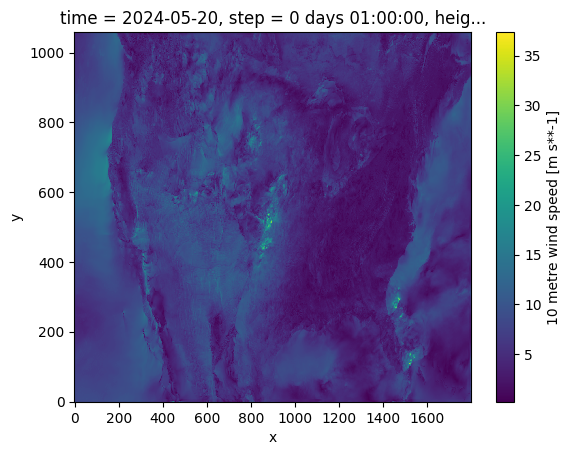

In [8]:
wind["si10"].plot.imshow()

In [9]:
# the byte range changes for every filejjj, but Herbie must be reading that from the .idx file so it is fast
Herbie(
    "2024-05-21",
    model="hrrr",
    product="sfc",
    fxx=1,
).inventory(search="WIND")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-21 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
78,79,56441495,57592985.0,56441495-57592985,2024-05-21,2024-05-21 01:00:00,WIND,10 m above ground,0-1 hour max fcst,:WIND:10 m above ground:0-1 hour max fcst


In [10]:
Herbie(
    "2024-05-22",
    model="hrrr",
    product="sfc",
    fxx=1,
).inventory(search="WIND")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
78,79,56117318,57276734.0,56117318-57276734,2024-05-22,2024-05-22 01:00:00,WIND,10 m above ground,0-1 hour max fcst,:WIND:10 m above ground:0-1 hour max fcst


In [11]:
# check out the sub-hourly data
H = Herbie(
    "2024-05-20",
    model="hrrr",
    product="subh",
    fxx=1,
)
H.inventory()

✅ Found ┊ model=hrrr ┊ product=subh ┊ 2024-May-20 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,308735.0,0-308735,2024-05-20,2024-05-20 01:00:00,REFC,entire atmosphere,15 min fcst,:REFC:entire atmosphere:15 min fcst
1,2,308736,476217.0,308736-476217,2024-05-20,2024-05-20 01:00:00,RETOP,cloud top,15 min fcst,:RETOP:cloud top:15 min fcst
2,3,476218,804670.0,476218-804670,2024-05-20,2024-05-20 01:00:00,var discipline=0 center=7 local_table=1 parmca...,entire atmosphere,15 min fcst,:var discipline=0 center=7 local_table=1 parmc...
3,4,804671,965750.0,804671-965750,2024-05-20,2024-05-20 01:00:00,VIL,entire atmosphere,15 min fcst,:VIL:entire atmosphere:15 min fcst
4,5,965751,2312548.0,965751-2312548,2024-05-20,2024-05-20 01:00:00,VIS,surface,15 min fcst,:VIS:surface:15 min fcst
...,...,...,...,...,...,...,...,...,...,...
191,192,196129792,197575895.0,196129792-197575895,2024-05-20,2024-05-20 01:00:00,USWRF,top of atmosphere,60 min fcst,:USWRF:top of atmosphere:60 min fcst
192,193,197575896,199207080.0,197575896-199207080,2024-05-20,2024-05-20 01:00:00,SBT123,top of atmosphere,60 min fcst,:SBT123:top of atmosphere:60 min fcst
193,194,199207081,200845185.0,199207081-200845185,2024-05-20,2024-05-20 01:00:00,SBT124,top of atmosphere,60 min fcst,:SBT124:top of atmosphere:60 min fcst
194,195,200845186,202375883.0,200845186-202375883,2024-05-20,2024-05-20 01:00:00,SBT113,top of atmosphere,60 min fcst,:SBT113:top of atmosphere:60 min fcst


In [15]:
H.xarray("VIL")

<xarray.Dataset> Size: 61MB
Dimensions:              (step: 4, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2024-05-20
  * step                 (step) timedelta64[ns] 32B 00:15:00 ... 01:00:00
    atmosphere           float64 8B 0.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           (step) datetime64[ns] 32B 2024-05-20T00:15:00 ... 20...
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    veril                (step, y, x) float32 30MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 subh
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /root/data/hrrr/20240520/subset_cee48f5c__hrrr.t...
    search:                  VIL